## Import Libraries

In [130]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
## DATASET

O Dataset de teino é constituido por 5000 casos e pelos seguintes atributos: 

* **city_name** - nome da cidade em causa;
* **record_date** - o timestamp associado ao registo;
* **magnitude_of_delay** - magnitude do atraso provocado pelos incidentes que se verificam no record_date correspondente;
* **delay_in_seconds** - atraso, em segundos, provocado pelos incidentes que se verificam no record_date correspondente;
* **affected_roads** - estradas afectadas pelos incidentes que se verificam no record_date correspondente;
* **luminosity** - o nível de luminosidade que se verificava na cidade de Guimarães;
* **avg_temperature** - valor médio da temperatura para o record_date na cidade de Guimarães;
* **avg_atm_pressure** - valor médio da pressão atmosférica para o record_date na cidade de Guimarães;
* **avg_humidity** - valor médio de humidade para o record_date na cidade de Guimarães;
* **avg_wind_speed** - valor médio da velocidade do vento para o record_date na cidade de Guimarães;
* **avg_precipitation** - valor médio de precipitação para o record_date na cidade de Guimarães;
* **avg_rain** - avaliação qualitativa do nível de precipitação para o record_date na cidade de Guimarães;
* **incidents** - indicação acerca do nível de incidentes rodoviários que se verificam no record_date correspondente na cidade de Guimarães.

---

## Get the Data

In [131]:
#Read CSV
training = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

## Data Visualisation

In [132]:
training.describe()
test.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1206.0
mean,565.080431,14.649254,1018.024876,73.865672,1.332504,0.0
std,1584.544376,4.691180,5.338753,17.202341,1.337510,0.0
min,0.000000,2.000000,999.000000,7.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,62.000000,0.000000,0.0
50%,0.000000,14.000000,1018.000000,77.000000,1.000000,0.0
75%,268.750000,18.000000,1022.000000,90.000000,2.000000,0.0
max,14866.000000,30.000000,1031.000000,100.000000,9.000000,0.0


In [133]:
training.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 

In [134]:
#Verificar se há missing values
print(training.isna().sum()) 

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


<AxesSubplot:>

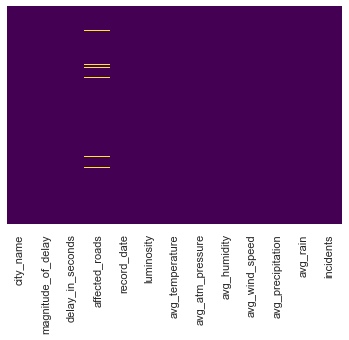

In [135]:
sns.heatmap(training.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [136]:
#Drop the missing values
training.drop(['affected_roads'],axis=1,inplace=True)

In [137]:
training.isnull().sum()

city_name             0
magnitude_of_delay    0
delay_in_seconds      0
record_date           0
luminosity            0
avg_temperature       0
avg_atm_pressure      0
avg_humidity          0
avg_wind_speed        0
avg_precipitation     0
avg_rain              0
incidents             0
dtype: int64

In [138]:
#Check unique values
training.nunique() 

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [139]:
#Drop columns with only one entry
training.drop(['city_name'],axis=1,inplace=True)
training.drop(['avg_precipitation'],axis=1,inplace=True)

In [140]:
# Verifica se há valores duplicados
print(training.duplicated().sum()) 

0


In [141]:
print(training['incidents'].value_counts())

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64


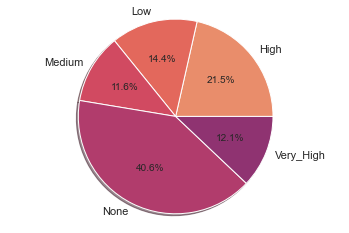

In [142]:
#Change incidents format
labels = training['incidents'].astype('category').cat.categories.tolist()
counts = training['incidents'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct="%1.1f%%",shadow=True)
ax1.axis('equal')
plt.show()

In [143]:
#Handling Categoric Data
training['magnitude_of_delay'] = pd.factorize(training['magnitude_of_delay'])[0] + 1
training['luminosity'] = pd.factorize(training['luminosity'])[0] + 1
training['avg_rain'] = pd.factorize(training['avg_rain'])[0] + 1

In [144]:
#Convert date format object -> datetime
training['record_date'] = pd.to_datetime(training['record_date'], format = '%Y-%m-%d %H:%M',errors='coerce')
assert training['record_date'].isnull().sum() == 0, 'missing record date'
training['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [145]:
#Extract date info

training['record_date_year'] = training['record_date'].dt.year
training['record_date_month'] = training['record_date'].dt.month
training['record_date_day'] = training['record_date'].dt.day
training['record_date_hour'] = training['record_date'].dt.hour
training['record_date_minute'] = training['record_date'].dt.minute

training.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,1,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,None,2021,3,15,23,0
1,1,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,None,2021,12,25,18,0
2,1,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,Low,2021,3,12,15,0
3,2,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,Very_High,2021,9,29,9,0
4,1,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,High,2021,6,13,11,0


In [146]:
training.nunique()

magnitude_of_delay       3
delay_in_seconds      1186
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_rain                 4
incidents                5
record_date_year         1
record_date_month       11
record_date_day         31
record_date_hour        24
record_date_minute       1
dtype: int64

In [147]:
#Drop fields with only one value

training.drop('record_date_year',axis=1,inplace=True)
training.drop('record_date_minute',axis=1,inplace=True)
training.drop('record_date',axis=1,inplace=True)
training.dropna(inplace=True)

In [148]:
#Replace categorical target field

replace_map_comp = { 'incidents' : { 'None' : 0 , 'Low' : 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}
print(replace_map_comp)
training.replace(replace_map_comp,inplace=True)
training.head()

{'incidents': {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4}}


,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,record_date_month,record_date_day,record_date_hour
0,1,0,1,12.0,1013.0,70.0,1.0,1,0,3,15,23
1,1,385,1,12.0,1007.0,91.0,1.0,1,0,12,25,18
2,1,69,2,14.0,1025.0,64.0,0.0,1,1,3,12,15
3,2,2297,2,15.0,1028.0,75.0,1.0,1,4,9,29,9
4,1,0,2,27.0,1020.0,52.0,1.0,1,3,6,13,11


<AxesSubplot:>

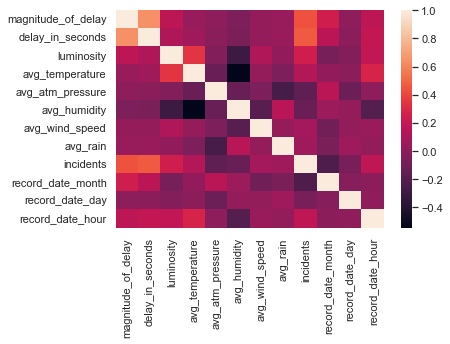

In [149]:
#VIZUALIZAÇÃO DE DADOS
sns.heatmap(training.corr())

In [150]:
sns.set_theme(palette="flare")

<AxesSubplot:xlabel='incidents', ylabel='Count'>

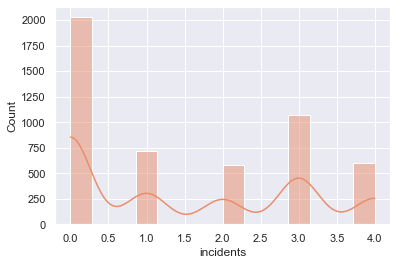

In [151]:
sns.histplot(training['incidents'],kde=True)

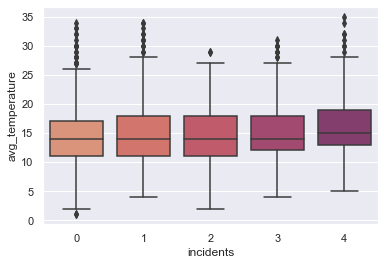

In [152]:
ax = sns.boxplot(x=training["incidents"], y=training["avg_temperature"])

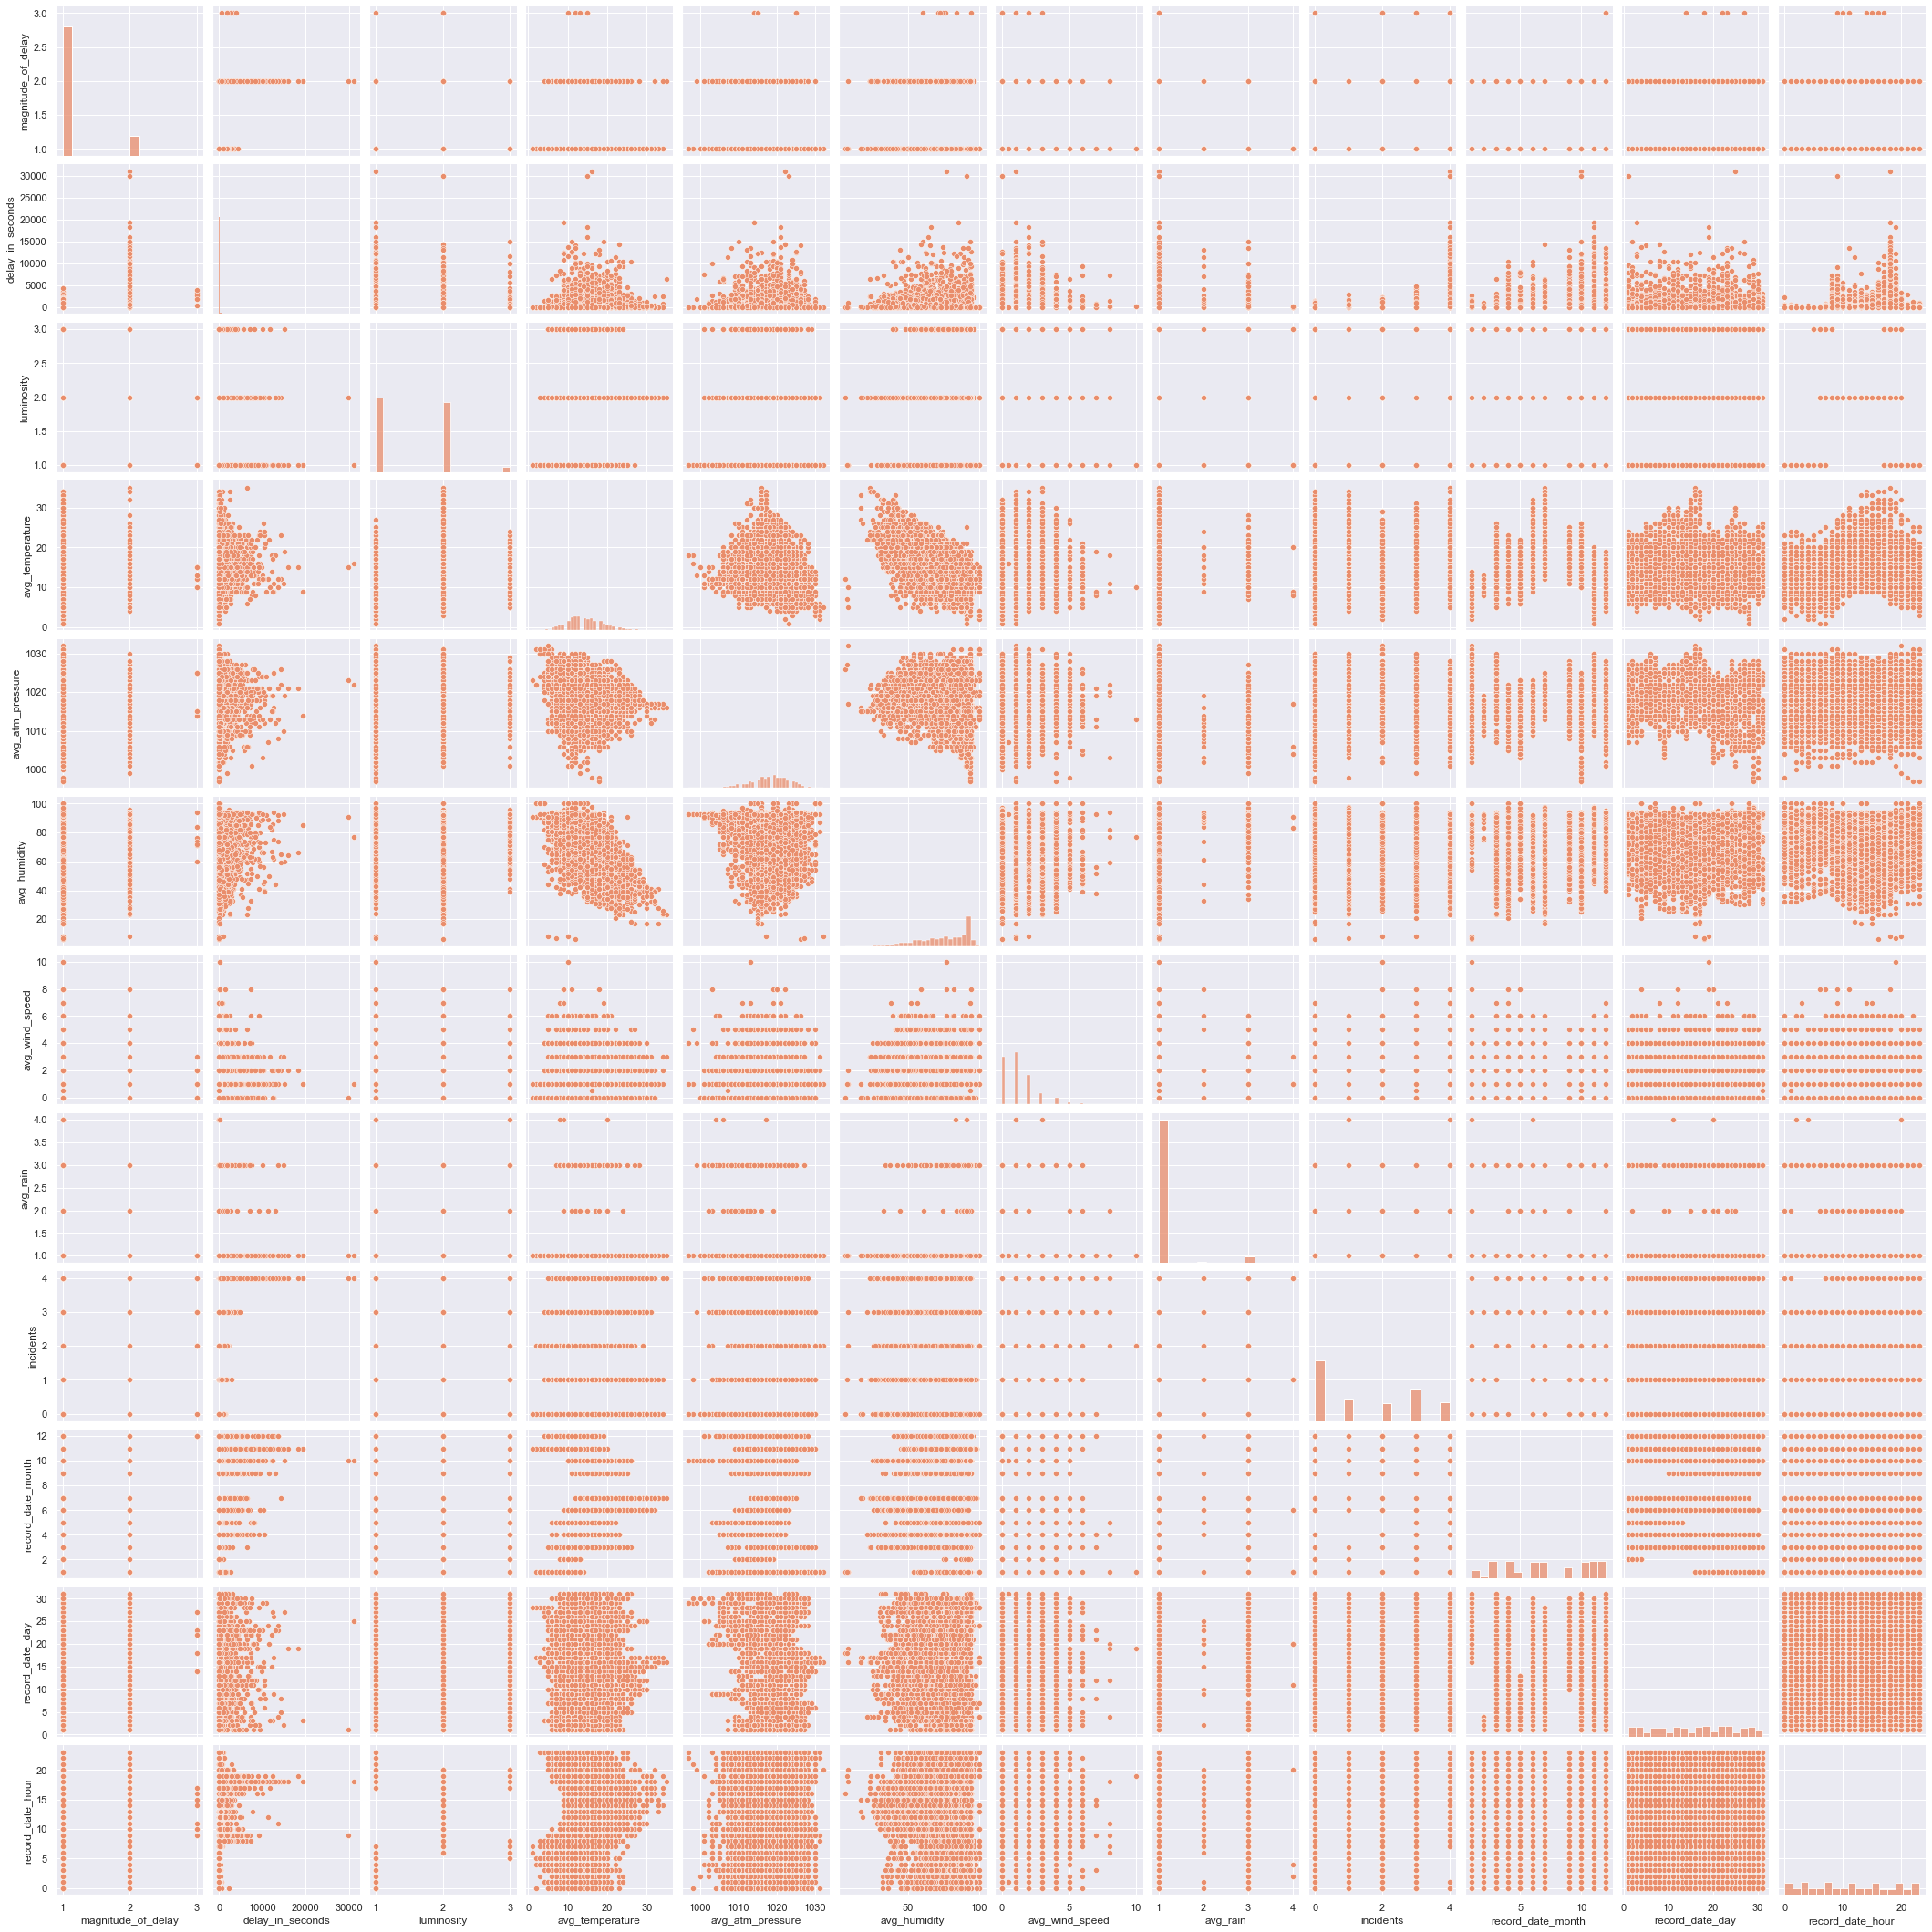

In [153]:
sns.pairplot(training)

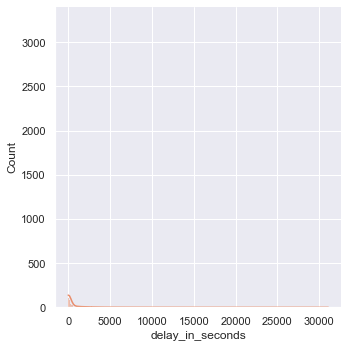

In [154]:
sns.displot(data=training, x="delay_in_seconds", kde=True)

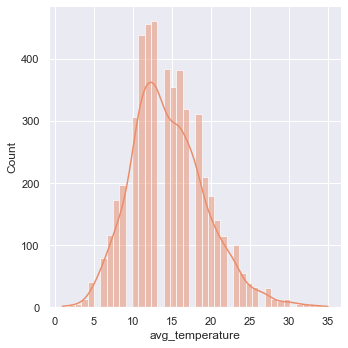

In [155]:
sns.displot(data=training, x="avg_temperature", kde=True)

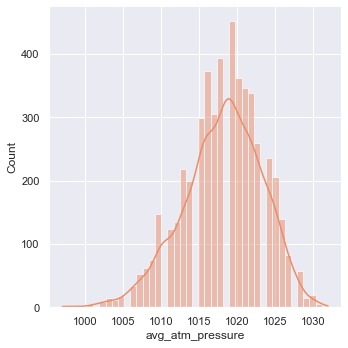

In [156]:
sns.displot(data=training, x="avg_atm_pressure", kde=True)

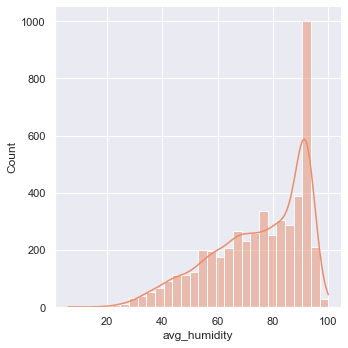

In [157]:
sns.displot(data=training, x="avg_humidity", kde=True)

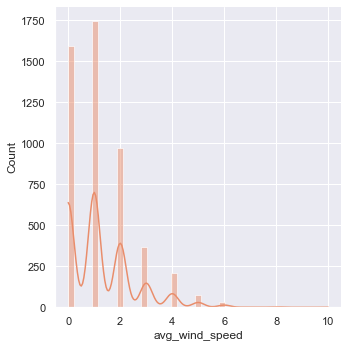

In [158]:
sns.displot(data=training, x="avg_wind_speed", kde=True)

## Data Preparation

### Tratamento dos dados

   * O *city_name* pode ser eliminado visto que é sempre Gimarães
   * O *avg_precipitation* também pode ser eliminado já que é sempre 0.
   * O *record_date* pode ser dividido em 4 colunas (hora, dia, mês, ano).
   * O *incidents* devemos passar para o tipo int(None=0, Low=1, Medium=2,High=3, Very High=4)
   * A *luminosity* pode ser passada para o tipo int(Dark=0, Low Light=1, Light=2)
   * O *magnitude_of_delay* também passa para int(UNDEFINED=0, MAJOR=1, MODERATE=2)
   * Da mesma forma o *avg_rain* passa para int(Sem Chuva=0, chuva fraca=1, chuva moderada=2, chuva forte =3)
   * *affected_roads o que fazr?*
   
### Drop redundant columns

## Model Training

In [159]:
#divisão do target
x = training.drop(['incidents'], axis=1) # input features - everything except the incidents feature
y = training['incidents']                # target feature - incidents

x

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,record_date_month,record_date_day,record_date_hour
0,1,0,1,12.0,1013.0,70.0,1.0,1,3,15,23
1,1,385,1,12.0,1007.0,91.0,1.0,1,12,25,18
2,1,69,2,14.0,1025.0,64.0,0.0,1,3,12,15
3,2,2297,2,15.0,1028.0,75.0,1.0,1,9,29,9
4,1,0,2,27.0,1020.0,52.0,1.0,1,6,13,11
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,1,13.0,1021.0,56.0,0.0,1,4,13,0
4996,1,0,2,19.0,1017.0,68.0,0.0,1,7,6,14
4997,1,0,1,13.0,1023.0,47.0,2.0,1,3,18,3
4998,1,0,1,12.0,1014.0,93.0,2.0,1,11,2,6


In [160]:
y

0       0
1       0
2       1
3       4
4       3
       ..
4995    3
4996    0
4997    0
4998    0
4999    0
Name: incidents, Length: 5000, dtype: int64

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.24, random_state=2022)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 3419 to 4349
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  1200 non-null   int64  
 1   delay_in_seconds    1200 non-null   int64  
 2   luminosity          1200 non-null   int64  
 3   avg_temperature     1200 non-null   float64
 4   avg_atm_pressure    1200 non-null   float64
 5   avg_humidity        1200 non-null   float64
 6   avg_wind_speed      1200 non-null   float64
 7   avg_rain            1200 non-null   int64  
 8   record_date_month   1200 non-null   int64  
 9   record_date_day     1200 non-null   int64  
 10  record_date_hour    1200 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 112.5 KB


### DecisionTree

In [162]:
clf = DecisionTreeClassifier(random_state=2022)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
predictions

array([1, 4, 0, ..., 0, 3, 0])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       503
           1       0.90      0.82      0.86       161
           2       0.86      0.82      0.84       137
           3       0.85      0.89      0.87       252
           4       0.88      0.85      0.87       147

    accuracy                           0.91      1200
   macro avg       0.89      0.87      0.88      1200
weighted avg       0.91      0.91      0.91      1200



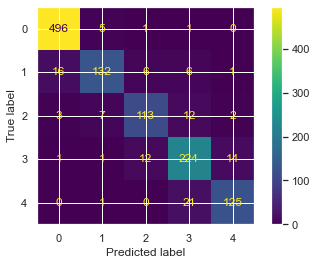

In [163]:
print(classification_report(Y_test, predictions))
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

### RandomForest

In [164]:
# Random Forest
clf = RandomForestClassifier(n_estimators=500, random_state=2022, criterion='entropy')
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       503
           1       0.86      0.89      0.87       161
           2       0.89      0.78      0.83       137
           3       0.90      0.90      0.90       252
           4       0.90      0.95      0.92       147

    accuracy                           0.92      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.92      0.92      0.92      1200



<function matplotlib.pyplot.show(close=None, block=None)>

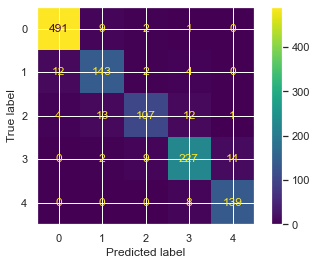

In [165]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### BaggingClassifier

In [166]:
# Bagging normal 72 %
clf = BaggingClassifier(KNeighborsClassifier(), random_state=2022, max_samples=0.5, max_features=0.5)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       503
           1       0.58      0.48      0.53       161
           2       0.68      0.28      0.40       137
           3       0.65      0.48      0.55       252
           4       0.77      0.72      0.74       147

    accuracy                           0.69      1200
   macro avg       0.68      0.58      0.61      1200
weighted avg       0.68      0.69      0.66      1200



<function matplotlib.pyplot.show(close=None, block=None)>

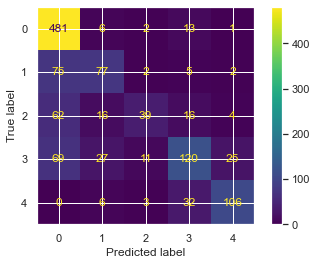

In [167]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### ExtraTreesClassifier

In [168]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       503
           1       0.78      0.76      0.77       161
           2       0.82      0.72      0.77       137
           3       0.86      0.88      0.87       252
           4       0.89      0.90      0.89       147

    accuracy                           0.88      1200
   macro avg       0.86      0.84      0.85      1200
weighted avg       0.88      0.88      0.88      1200



<function matplotlib.pyplot.show(close=None, block=None)>

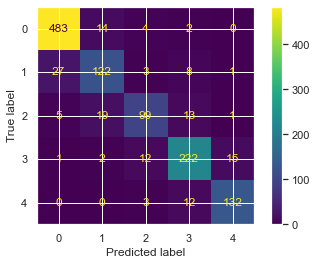

In [169]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### AdaBoostClassifier

In [170]:
clf = AdaBoostClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       503
           1       0.68      0.70      0.69       161
           2       0.33      0.20      0.25       137
           3       0.75      0.74      0.74       252
           4       0.77      0.90      0.83       147

    accuracy                           0.75      1200
   macro avg       0.67      0.68      0.67      1200
weighted avg       0.73      0.75      0.74      1200



<function matplotlib.pyplot.show(close=None, block=None)>

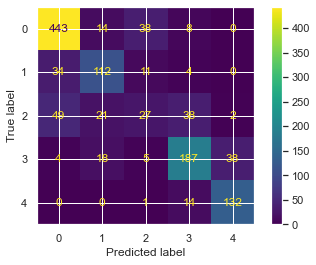

In [171]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### GradientBoostingClassifier

In [172]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       503
           1       0.70      0.73      0.72       161
           2       0.64      0.39      0.49       137
           3       0.80      0.82      0.81       252
           4       0.87      0.90      0.88       147

    accuracy                           0.82      1200
   macro avg       0.78      0.76      0.76      1200
weighted avg       0.81      0.82      0.81      1200



<function matplotlib.pyplot.show(close=None, block=None)>

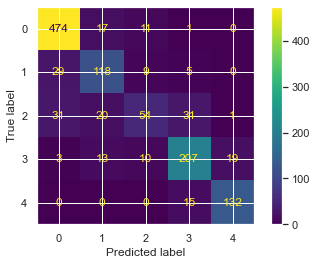

In [173]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

Saving the results in CSV file

In [174]:
# acrescentar headers
submission = pd.DataFrame(predictions, columns = ["Incidents"])
submission.insert(0, "RowId", range(1,1201), True)
submission.nunique()

#transformação dos valores para formato escrito
submission['Incidents']= submission['Incidents'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})
submission.info()

#passagem para ficheiro csv
submission.to_csv('submission.csv', index=False)

#submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   RowId      1200 non-null   int64 
 1   Incidents  1200 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB
